In [1]:
import sys, os
import numpy as np
import time, h5py

from utils import default_paths, nsd_utils, texture_utils, prf_utils
from model_fitting import initialize_fitting 
import argparse
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
for subject in [1,2,3,4,5,6,7,8,999,998]:

    fn2load = os.path.join(default_paths.stim_labels_root,'S%d_animacy.npy'%subject)
    d = np.load(fn2load, allow_pickle=True).item()
    has_animate = d['has_animate']
    has_inanimate = d['has_inanimate']
    binary_labels = d['animate-inanimate']
    has_animate_wholeimage = d['has_animate_wholeimage']
    has_inanimate_wholeimage = d['has_inanimate_wholeimage']
    binary_labels_wholeimage = d['animate-inanimate_wholeimage']
    
    prf_ind = 1000
    un, counts = np.unique(np.array([has_inanimate[:,prf_ind], has_animate[:,prf_ind]]).T,axis=0, return_counts=True)
    print(un, counts)
    un, counts = np.unique(binary_labels[:,prf_ind], return_counts=True)
    print(un, counts)
    un, counts = np.unique(np.array([has_inanimate_wholeimage, has_animate_wholeimage]).T,axis=0, return_counts=True)
    print(un, counts)
    un, counts = np.unique(binary_labels_wholeimage, return_counts=True)
    print(un, counts)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [  11 1378 3340 5271]
[ 0.  1. nan] [1378 3340 5282]
[[0. 1.]
 [1. 0.]
 [1. 1.]] [1336 3285 5379]
[ 0.  1. nan] [1336 3285 5379]
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [   6 1412 3443 5139]
[ 0.  1. nan] [1412 3443 5145]
[[0. 1.]
 [1. 0.]
 [1. 1.]] [1384 3380 5236]
[ 0.  1. nan] [1384 3380 5236]
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [   8 1390 3406 5196]
[ 0.  1. nan] [1390 3406 5204]
[[0. 1.]
 [1. 0.]
 [1. 1.]] [1360 3354 5286]
[ 0.  1. nan] [1360 3354 5286]
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [   4 1362 3440 5194]
[ 0.  1. nan] [1362 3440 5198]
[[0. 1.]
 [1. 0.]
 [1. 1.]] [1332 3373 5295]
[ 0.  1. nan] [1332 3373 5295]
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [   5 1391 3461 5143]
[ 0.  1. nan] [1391 3461 5148]
[[0. 1.]
 [1. 0.]
 [1. 1.]] [1361 3396 5243]
[ 0.  1. nan] [1361 3396 5243]
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [  10 1418 3476 5096]
[ 0.  1. nan] [1418 3476 5106]
[[0. 1.]
 [1. 0.]
 [1. 1.]] [1391 3429 5180]
[ 0.  1. nan] [1391 3429 5180]
[[0.

In [ ]:
ims2load = np.arange(0,1000)
# subject=8
# subject=999
subject=998

if subject<9:
    image_data = nsd_utils.get_image_data(subject)
elif subject==999:
    from utils import coco_utils
    image_data = coco_utils.load_indep_coco_images(n_pix=240)
elif subject==998:
    from utils import coco_utils
    image_data = coco_utils.load_indep_coco_images_big(n_pix=240)
image_data = nsd_utils.image_uncolorize_fn(image_data[ims2load,:,:,:])
# image_data = image_data[ims2use,:,:,:]
n_images = image_data.shape[0]

Initializing coco api...
loading annotations into memory...
Done (t=0.85s)
creating index...
index created!
loading annotations into memory...
Done (t=25.28s)
creating index...
index created!
Initializing coco api...
loading annotations into memory...
Done (t=0.68s)
creating index...
index created!
loading annotations into memory...
Done (t=19.05s)
creating index...
index created!

loading images from /user_data/mmhender/nsd/stimuli/Indep_big_set_stimuli_240.h5py



In [24]:
fn2load = os.path.join(default_paths.stim_labels_root,'S%d_animacy.npy'%subject)
d = np.load(fn2load, allow_pickle=True).item()
has_animate = d['has_animate']
has_inanimate = d['has_inanimate']
binary_labels = d['animate-inanimate']
has_animate_wholeimage = d['has_animate_wholeimage']
has_inanimate_wholeimage = d['has_inanimate_wholeimage']
binary_labels_wholeimage = d['animate-inanimate_wholeimage']

In [25]:
prf_ind = 600

print(np.unique(np.array([has_inanimate[:,prf_ind], has_animate[:,prf_ind]]).T,axis=0, return_counts=True))
print(np.unique(binary_labels[:,prf_ind], return_counts=True))

(array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]]), array([ 897, 2131, 3296, 3676]))
(array([ 0.,  1., nan]), array([2131, 3296, 4573]))


In [26]:
print(np.unique(np.array([has_inanimate_wholeimage, has_animate_wholeimage]).T,axis=0, return_counts=True))
print(np.unique(binary_labels_wholeimage, return_counts=True))

(array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]]), array([ 215,  933, 2721, 6131]))
(array([ 0.,  1., nan]), array([ 933, 2721, 6346]))


In [27]:
np.sum(has_animate, axis=0)

array([3860., 3860., 3860., ..., 6919., 6919., 6919.])

In [28]:
prf_ind = 600;
which_prf_grid=5
models = initialize_fitting.get_prf_models(which_grid=which_prf_grid)    

prf_params = models[prf_ind,:]    
x,y,sigma = prf_params
n_pix = 240
aperture=1.0
prf = prf_utils.gauss_2d(center=[x, y], sd=sigma, patch_size=n_pix, aperture=1.0, \
                                      dtype=np.float32)
prf_mask = prf_utils.get_prf_mask(center=[x, y], sd=sigma, patch_size=n_pix)
mask_sum = np.sum(prf_mask)
min_pix_req = np.ceil(mask_sum*0.10)

n_prf_sd_out = 2
prf_bbox = texture_utils.get_bbox_from_prf(prf_params, (n_pix, n_pix), n_prf_sd_out, \
                                                   min_pix=None, verbose=False, force_square=False)

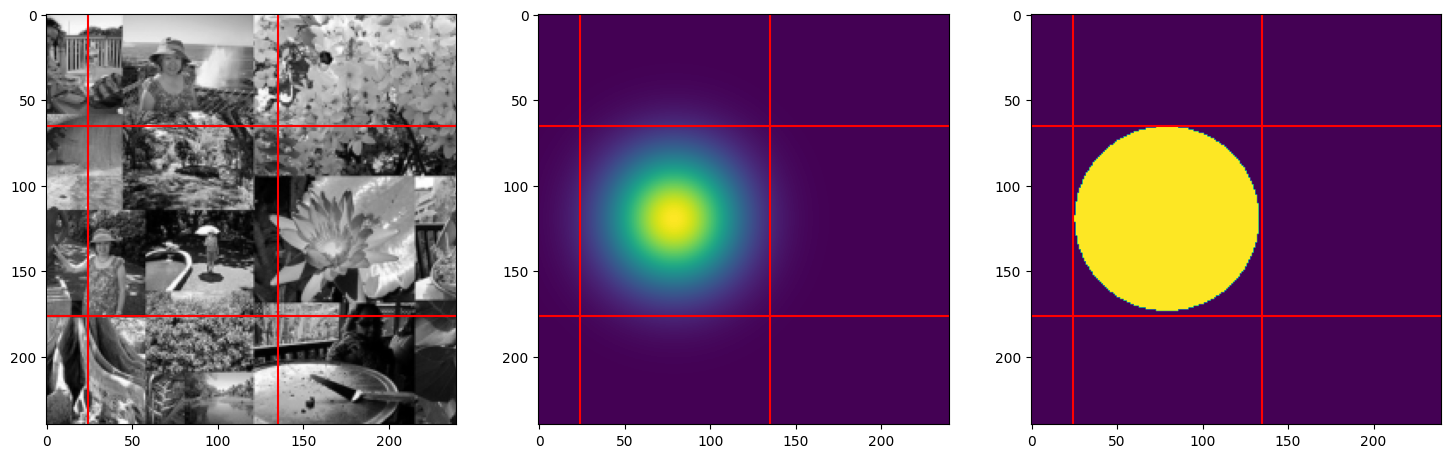

In [29]:
# Plot pRF bounding boxes

ii = np.where(has_animate[:,prf_ind]==1)[0][0]
nsd_image = np.moveaxis(image_data[ii,:,:,:], [0],[2])

plt.figure(figsize=(18,6));
plt.subplot(1,3,1)
plt.imshow(nsd_image, cmap='gray')
# show the prf on top to make sure it is where it should be
plt.axhline([prf_bbox[0]],color='r')
plt.axhline([prf_bbox[1]],color='r')
plt.axvline([prf_bbox[2]],color='r')
plt.axvline([prf_bbox[3]],color='r')

plt.subplot(1,3,2)
plt.imshow(prf)
# plt.colorbar()
plt.axhline([prf_bbox[0]],color='r')
plt.axhline([prf_bbox[1]],color='r')
plt.axvline([prf_bbox[2]],color='r')
plt.axvline([prf_bbox[3]],color='r')

plt.subplot(1,3,3)
plt.imshow(prf_mask)
plt.axhline([prf_bbox[0]],color='r')
plt.axhline([prf_bbox[1]],color='r')
plt.axvline([prf_bbox[2]],color='r')
plt.axvline([prf_bbox[3]],color='r')

Text(0.5, 0.98, 'animate=1, inanimate=0, animate-inanimate=0.00')

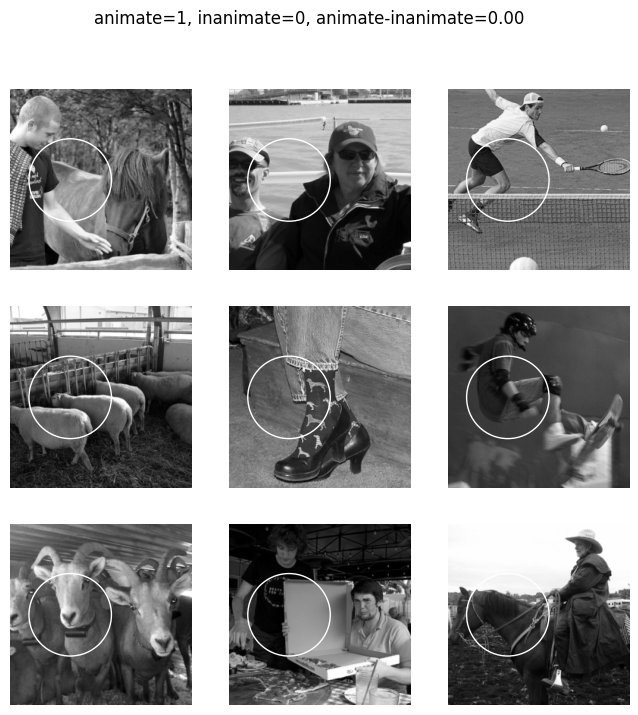

In [30]:
# plot examples - "has animate" patches

ims2use = np.where((has_animate[:,prf_ind]==1) & (has_inanimate[:,prf_ind]==0) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    
plt.suptitle('animate=%d, inanimate=%d, animate-inanimate=%.2f'%(has_animate[im, prf_ind], \
                                                            has_inanimate[im, prf_ind], \
                                                           binary_labels[im, prf_ind]))

Text(0.5, 0.98, 'animate=0, inanimate=1, animate-inanimate=1.00')

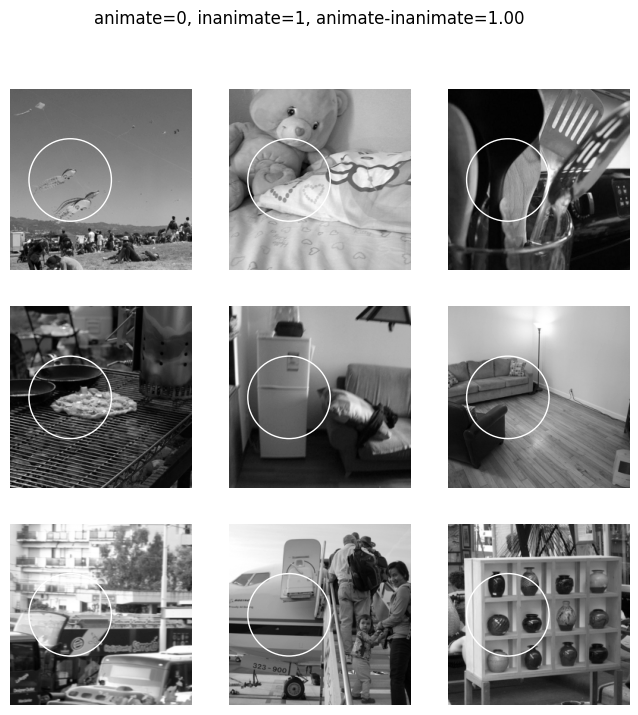

In [31]:
# plot examples - "has inanimate" patches

ims2use = np.where((has_animate[:,prf_ind]==0) & (has_inanimate[:,prf_ind]==1) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    
plt.suptitle('animate=%d, inanimate=%d, animate-inanimate=%.2f'%(has_animate[im, prf_ind], \
                                                            has_inanimate[im, prf_ind], \
                                                           binary_labels[im, prf_ind]))

Text(0.5, 0.98, 'animate=0, inanimate=0, animate-inanimate=nan')

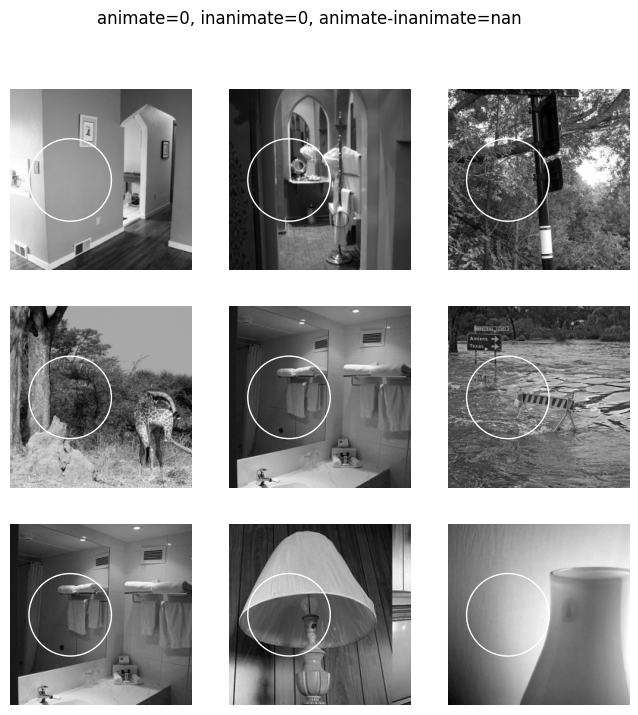

In [32]:
# plot examples - "has neither" patches

ims2use = np.where((has_animate[:,prf_ind]==0) & (has_inanimate[:,prf_ind]==0) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    
plt.suptitle('animate=%d, inanimate=%d, animate-inanimate=%.2f'%(has_animate[im, prf_ind], \
                                                            has_inanimate[im, prf_ind], \
                                                           binary_labels[im, prf_ind]))

Text(0.5, 0.98, 'animate=1, inanimate=1, animate-inanimate=nan')

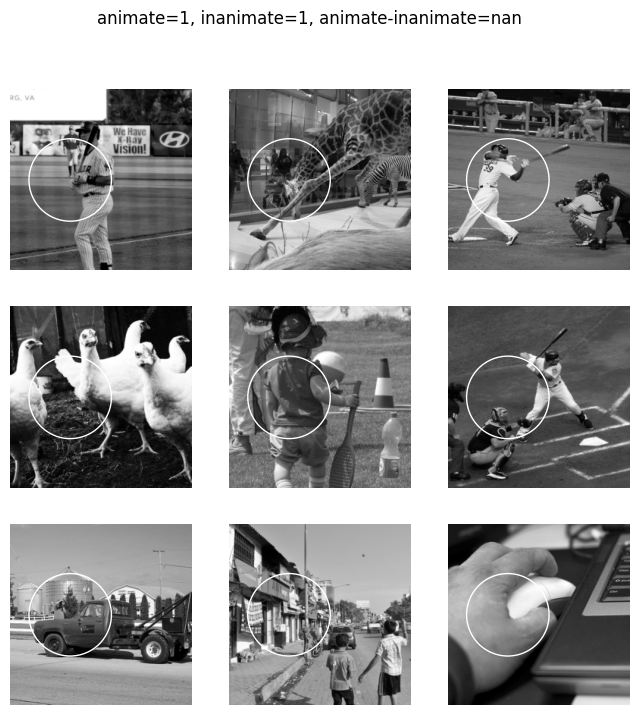

In [33]:
# plot examples - "has both" patches

ims2use = np.where((has_animate[:,prf_ind]==1) & (has_inanimate[:,prf_ind]==1) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    
plt.suptitle('animate=%d, inanimate=%d, animate-inanimate=%.2f'%(has_animate[im, prf_ind], \
                                                            has_inanimate[im, prf_ind], \
                                                           binary_labels[im, prf_ind]))

Text(0.5, 0.98, 'animate=1, inanimate=0, animate-inanimate=0.00')

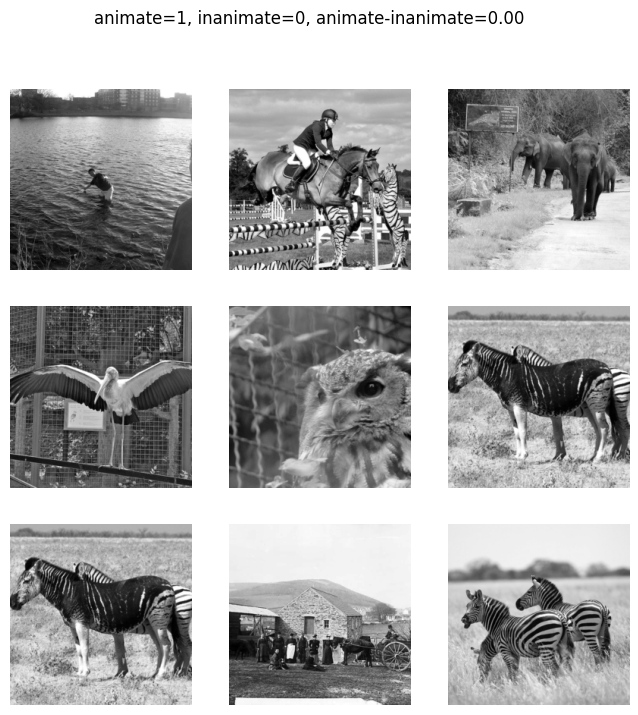

In [34]:
# plot examples -  whole image "has animate" patches

ims2use = np.where((has_animate_wholeimage==1) & (has_inanimate_wholeimage==0) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
   
    plt.axis('off')
    
plt.suptitle('animate=%d, inanimate=%d, animate-inanimate=%.2f'%(has_animate_wholeimage[im], \
                                                            has_inanimate_wholeimage[im], \
                                                           binary_labels_wholeimage[im]))

Text(0.5, 0.98, 'animate=0, inanimate=1, animate-inanimate=1.00')

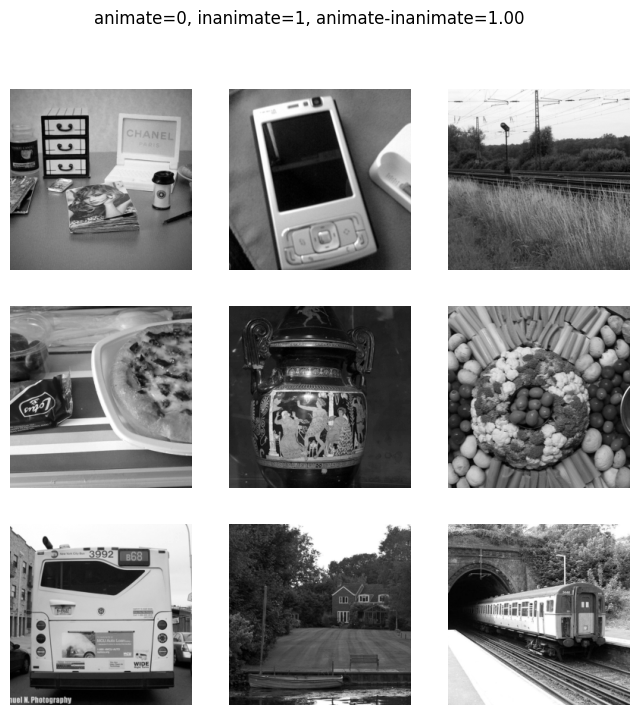

In [35]:
# plot examples -  whole image "has inanimate" patches

ims2use = np.where((has_animate_wholeimage==0) & (has_inanimate_wholeimage==1) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
   
    plt.axis('off')
    
plt.suptitle('animate=%d, inanimate=%d, animate-inanimate=%.2f'%(has_animate_wholeimage[im], \
                                                            has_inanimate_wholeimage[im], \
                                                           binary_labels_wholeimage[im]))

Text(0.5, 0.98, 'animate=1, inanimate=1, animate-inanimate=nan')

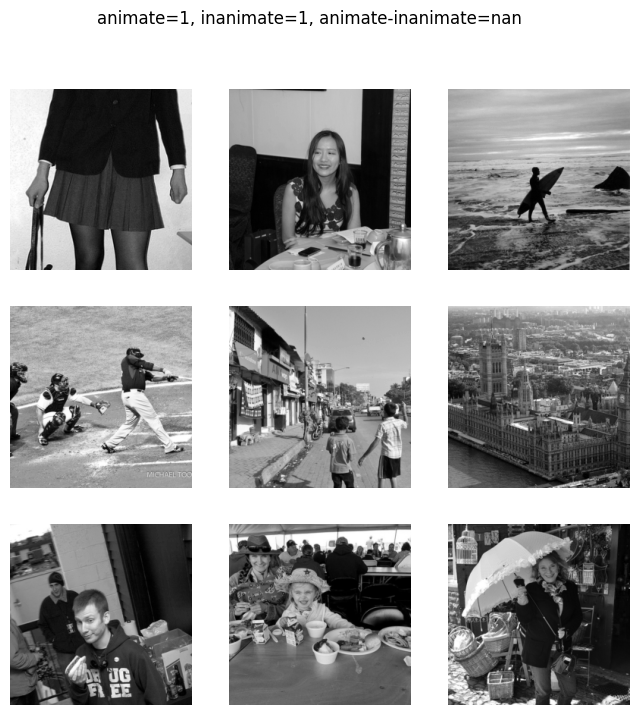

In [36]:
# plot examples -  whole image "has both" patches

ims2use = np.where((has_animate_wholeimage==1) & (has_inanimate_wholeimage==1) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
   
    plt.axis('off')
    
plt.suptitle('animate=%d, inanimate=%d, animate-inanimate=%.2f'%(has_animate_wholeimage[im], \
                                                            has_inanimate_wholeimage[im], \
                                                           binary_labels_wholeimage[im]))

Text(0.5, 0.98, 'animate=0, inanimate=0, animate-inanimate=nan')

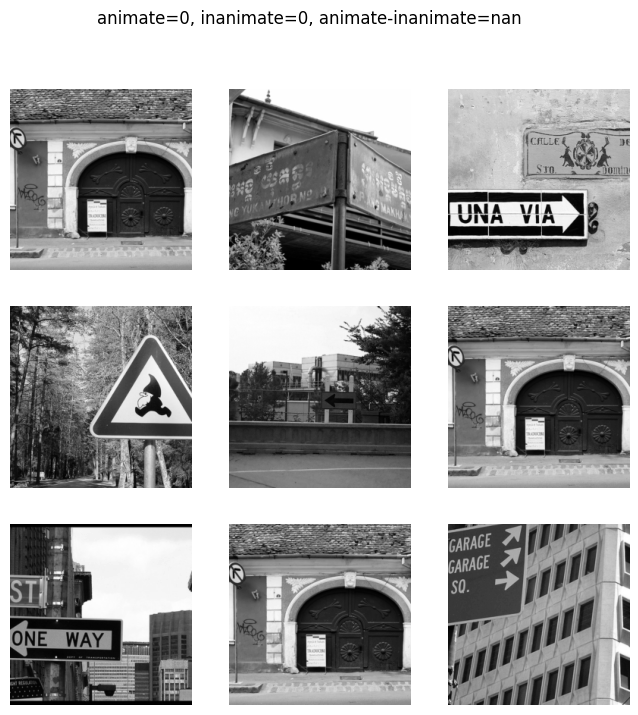

In [37]:
# plot examples -  whole image "has neither" patches

ims2use = np.where((has_animate_wholeimage==0) & (has_inanimate_wholeimage==0) & \
                   np.isin(np.arange(10000), ims2load))[0]

images2plot = np.random.choice(ims2use,9);

plt.figure(figsize=(8,8));

for ii, im in enumerate(images2plot):
    ax = plt.subplot(3,3,ii+1);
    plt.imshow(np.moveaxis(image_data[im,:,:,:],[0],[2]),cmap='gray')
   
    plt.axis('off')
    
plt.suptitle('animate=%d, inanimate=%d, animate-inanimate=%.2f'%(has_animate_wholeimage[im], \
                                                            has_inanimate_wholeimage[im], \
                                                           binary_labels_wholeimage[im]))